# Repulsive interaction

We will in this notebook use importance sampling to compute the ground state energies for the repulsive system with an elliptical harmonic oscillator trap.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from vmc.interface import *
from vmc import run_all

from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [87]:
mass = 1.0
omega = 1.0

beta = _lambda = np.sqrt(8)
radius = 0.0043

num_particles_list = [2, 10, 50, 100]
num_dimensions = 3

step_length = 0.1

num_samples = int(2**18)
num_thermalization_steps = int(0.1*num_samples)

alpha_min = 0.5*omega - 0.3
alpha_max = 0.5*omega + 0.3
num_alphas = 7

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)
bootstrap_samples = 0

In [88]:
def output_table(df, filename):
    columns = list(df)
    columns.remove("variance")
    columns.remove("std")
    columns.remove("block_var")

    df[columns].to_csv(
        filename,
        index=False,
        sep="&",
        header=[
            r"$\alpha$", r"$\langle E_L\rangle$",
            r"$A$", r"$t_C$", r"$\sigma_b$"],
        float_format="%.5f",
        line_terminator="\\\\ \n",
        quotechar=" "
    )

100%|██████████| 7/7 [00:31<00:00,  4.49s/it]


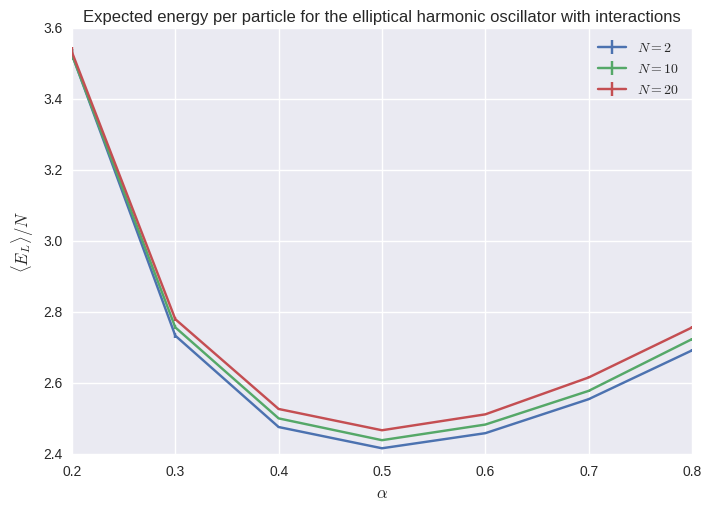

In [90]:
for num_particles in [2, 10, 20]:
    kwargs = {
        "num_samples": num_samples, "num_thermalization_steps": num_thermalization_steps,
        "step_length": step_length
    }

    wavefunction = PyInteractingEllipticalGaussian(
        num_particles, num_dimensions, mass, omega, beta, radius, spread=np.sqrt(step_length)
    )

    sampler_int = PySampler(
        wavefunction, PyEllipticalHarmonicOscillator(_lambda), PyImportanceMetropolis()
    )

    df_int = run_all(
        sampler_int, alphas, parameter_names, bootstrap_samples, **kwargs
    )

    output_table(df_int, "../data/tables/3D{0}N_interaction.dat".format(num_particles))

    plt.errorbar(
        df_int["alpha"], df_int["energy"]/num_particles,
        yerr=df_int["block_std"]/num_particles, label=r"$N = %d$" % num_particles
    )

plt.xlabel(r"$\alpha$", fontsize=12)
plt.ylabel(r"$\langle E_L\rangle/N$", fontsize=12)
plt.title(r"Expected energy per particle for the elliptical harmonic oscillator with interactions")
plt.legend(loc="best")
plt.savefig("../data/figures/problem_e.pdf")
plt.show()

In [71]:
display(df_int)

,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,70.277665,1.715317e-03,0.041416,0.989349,1.207942,0.320881,0.566463
1,0.3,55.788608,4.173409e-04,0.020429,0.981613,1.196526,0.041232,0.203057
2,0.4,50.434130,7.841003e-05,0.008855,0.970322,1.185169,0.007364,0.085815
3,0.5,49.366661,2.833595e-07,0.000532,0.961807,1.177682,0.000029,0.005418
4,0.6,50.371660,5.274559e-05,0.007263,0.949570,1.157409,0.003768,0.061385
5,0.7,52.312998,1.918603e-04,0.013851,0.937668,1.153572,0.013997,0.118308
6,0.8,55.243569,3.882746e-04,0.019705,0.924316,1.152055,0.026961,0.164197


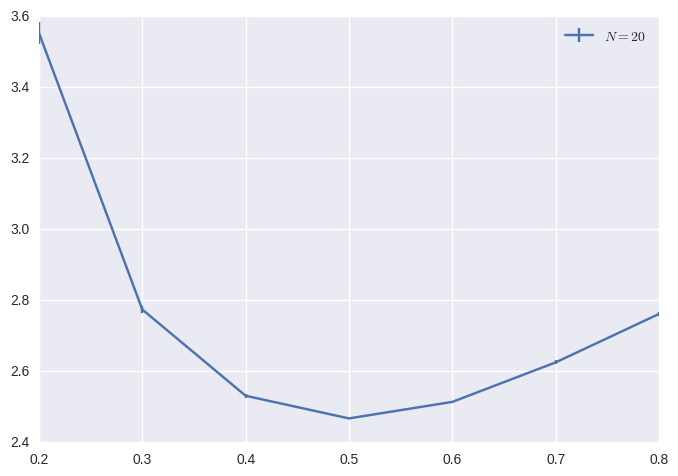

In [79]:
plt.errorbar(
    df_int["alpha"], df_int["energy"]/num_particles,
    yerr=df_int["block_std"]/num_particles, label=r"$N = %d$" % num_particles
)

plt.legend(loc="best")
plt.show()